In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [46]:
data = pd.read_csv('train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [47]:
print('shape:',data.shape)
print('Size :{}'.format(data.size))

shape: (20800, 5)
Size :104000


In [48]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [49]:
data.dropna(axis = 0, inplace=  True)

In [50]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [51]:
print('shape:',data.shape)
print('Size :{}'.format(data.size))

shape: (18285, 5)
Size :91425


In [52]:
y = data['label']
X = data['title']
print(data.columns)

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [53]:
data.drop(columns = ['id'])

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [54]:
data.reset_index(inplace = True)

In [55]:
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [57]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
corpus = []
lemmatizer = WordNetLemmatizer()
for i in range (0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word  in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [58]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [66]:
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
one_hot_words = [one_hot(words,5000) for words in corpus]
one_hot_words

[[3584, 2689, 1664, 1103, 525, 1567, 3808, 796, 4747, 4091],
 [1733, 4276, 685, 2751, 4958, 2616, 4616],
 [2219, 4450, 3871, 3170],
 [3650, 3519, 3643, 1975, 165, 1285],
 [113, 4958, 922, 3543, 2168, 4740, 4958, 3131, 4770, 1187],
 [3766,
  4805,
  3796,
  1063,
  3487,
  1274,
  1712,
  4192,
  508,
  1133,
  2155,
  2553,
  4602,
  3639,
  4616],
 [1431, 115, 4241, 2856, 1851, 1769, 1558, 1098, 1235, 873, 1134],
 [2842, 3851, 330, 432, 3818, 633, 1274, 2227, 1235, 873, 1134],
 [2537, 2930, 3576, 4130, 2395, 2722, 1216, 1877, 1274, 3056],
 [2162, 2143, 2861, 3920, 3983, 2079, 4579, 4950],
 [814, 1144, 1141, 618, 1010, 863, 502, 1809, 2322, 104, 3713],
 [1975, 3066, 525, 2039, 1274, 3818],
 [2961, 4928, 3043, 545, 3911, 2416, 334, 4165, 938],
 [3683, 731, 3408, 2330, 133, 2871, 3666, 1235, 873, 1134],
 [2304, 1010, 980, 3280, 4473, 1235, 873, 1134],
 [4982, 1922, 855, 4785, 3888, 3747, 4600, 1221, 4912, 775],
 [2603, 3519, 4276],
 [763, 1763, 4607, 4562, 1274, 2162, 269, 4616],
 [4089,

In [69]:
embedded_rep = pad_sequences(one_hot_words, padding = 'post', maxlen = 20)

In [75]:
embedded_rep

array([[3584, 2689, 1664, ...,    0,    0,    0],
       [1733, 4276,  685, ...,    0,    0,    0],
       [2219, 4450, 3871, ...,    0,    0,    0],
       ...,
       [3117, 2884, 4513, ...,    0,    0,    0],
       [1676, 3818, 1623, ...,    0,    0,    0],
       [3283, 4828, 3161, ...,    0,    0,    0]])

In [76]:
embedded_rep.shape

(18285, 20)

In [78]:
from sklearn.model_selection import train_test_split
X_data = np.array(embedded_rep)
y_data = np.array(y)

x_train,x_test, y_train, y_test = train_test_split(X_data, y_data, random_state= 32, test_size = 0.2)

In [80]:
print(x_train.shape)
print(x_test.shape)

(14628, 20)
(3657, 20)


In [83]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten, Embedding
from tensorflow.keras.models import Sequential

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(5000, embedding_vector_features, input_length = 20))
model.add(LSTM(200))
model.add(Dropout(0.4))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               192800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 393,001
Trainable params: 393,001
Non-trainable params: 0
_________________________________________________________________


In [84]:
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20, batch_size = 32)

Epoch 1/20
458/458 [==============================] - 27s 59ms/step - loss: 0.2588 - accuracy: 0.8859 - val_loss: 0.1962 - val_accuracy: 0.9161
Epoch 2/20
458/458 [==============================] - 23s 50ms/step - loss: 0.1388 - accuracy: 0.9502 - val_loss: 0.2150 - val_accuracy: 0.9185
Epoch 3/20
458/458 [==============================] - 23s 50ms/step - loss: 0.0979 - accuracy: 0.9648 - val_loss: 0.2606 - val_accuracy: 0.9163
Epoch 4/20
458/458 [==============================] - 23s 50ms/step - loss: 0.0708 - accuracy: 0.9763 - val_loss: 0.2663 - val_accuracy: 0.9117
Epoch 5/20
458/458 [==============================] - 24s 52ms/step - loss: 0.0518 - accuracy: 0.9830 - val_loss: 0.3010 - val_accuracy: 0.9174
Epoch 6/20
458/458 [==============================] - 22s 48ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.3941 - val_accuracy: 0.9013
Epoch 7/20
458/458 [==============================] - 23s 49ms/step - loss: 0.0284 - accuracy: 0.9917 - val_loss: 0.4252 - val_accuracy:

In [85]:
prediction = model.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict_classes(x_test)
print(confusion_matrix(y_test,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1813  185]
 [ 130 1529]]


In [89]:
print(accuracy_score(y_test,y_pred))

0.9138638228055783


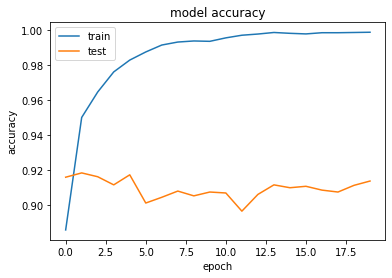

In [114]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

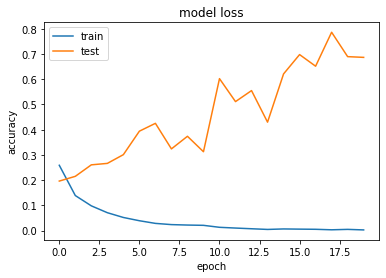

In [115]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:
from tensorflow.keras.layers import Bidirectional
model_1 = Sequential()
embedding_vector_features = 40
model_1 = Sequential()
model_1.add(Embedding(5000, embedding_vector_features, input_length = 20))
model_1.add(Bidirectional(LSTM(100)))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation = 'sigmoid'))

model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [118]:
hist_1 = model_1.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 32)

Epoch 1/10
458/458 [==============================] - 22s 49ms/step - loss: 0.2480 - accuracy: 0.8864 - val_loss: 0.1961 - val_accuracy: 0.9232
Epoch 2/10
458/458 [==============================] - 19s 42ms/step - loss: 0.1220 - accuracy: 0.9537 - val_loss: 0.2113 - val_accuracy: 0.9139
Epoch 3/10
458/458 [==============================] - 19s 42ms/step - loss: 0.0828 - accuracy: 0.9703 - val_loss: 0.2529 - val_accuracy: 0.9182
Epoch 4/10
458/458 [==============================] - 19s 41ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 0.2851 - val_accuracy: 0.9212
Epoch 5/10
458/458 [==============================] - 19s 41ms/step - loss: 0.0417 - accuracy: 0.9857 - val_loss: 0.2849 - val_accuracy: 0.9202
Epoch 6/10
458/458 [==============================] - 21s 46ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.3686 - val_accuracy: 0.9152
Epoch 7/10
458/458 [==============================] - 19s 42ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.4405 - val_accuracy:

In [119]:
y_pred1 = model_1.predict_classes(x_test)
print(confusion_matrix(y_test,y_pred1))

[[1834  164]
 [ 145 1514]]


In [120]:
print(accuracy_score(y_test,y_pred1))

0.9155045118949959


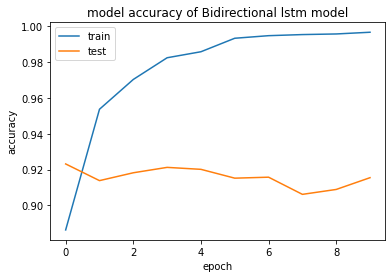

In [122]:
plt.plot(hist_1.history['accuracy'])
plt.plot(hist_1.history['val_accuracy'])
plt.title('model accuracy of Bidirectional lstm model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

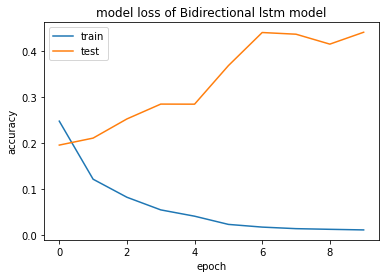

In [124]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('model loss of Bidirectional lstm model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_1.save('new_classifier.h5',hist_1)